### Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Data Reading

In [52]:
music = pd.read_csv('Music Info.csv')
user_history = pd.read_csv('User Listening History.csv')
data = pd.merge(user_history, music, on='track_id', how='inner')

In [53]:
print(music.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [54]:
print(user_history.head())

             track_id                                   user_id  playcount
0  TRIRLYL128F42539D1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
1  TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
2  TRLQPQJ128F42AA94F  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
3  TRTUCUY128F92E1D24  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
4  TRHDDQG12903CB53EE  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1


In [55]:
print(data.head())

             track_id                                   user_id  playcount  \
0  TRIRLYL128F42539D1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1   
1  TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1   
2  TRLQPQJ128F42AA94F  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1   
3  TRTUCUY128F92E1D24  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1   
4  TRHDDQG12903CB53EE  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1   

                            name                artist  \
0           Nothing From Nothing         Billy Preston   
1                  Paper Gangsta             Lady Gaga   
2                            Soy           Gipsy Kings   
3                 Stacked Actors          Foo Fighters   
4  Heaven's Gonna Burn Your Eyes  Thievery Corporation   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/340c79f3f19b448e...  0d42LKqrWFVu05jAv9mwwE   
1  https://p.scdn.co/m

In [56]:
unique_users = data['user_id'].nunique()
unique_songs = data['track_id'].nunique()
interactions = len(data)
sparsity  = 1 - (interactions / (unique_users * unique_songs))
print(f'Unique users: {unique_users}, Unique songs: {unique_songs}')
print(f'Total interactions: {interactions}')
print(f'Sparsity: {sparsity:.4f} %')


Unique users: 962037, Unique songs: 30459
Total interactions: 9711301
Sparsity: 0.9997 %


In [57]:
np.random.seed(42)

sampled_data = np.random.choice(data['user_id'].unique(), 
                                size=int(unique_users * 0.05), replace=False)
sampled_data = data[data['user_id'].isin(sampled_data)]
data = sampled_data.copy()
print(f'Sampled data shape: {sampled_data.shape}')

Sampled data shape: (482188, 23)


In [58]:
unique_users = sampled_data['user_id'].nunique()
unique_songs = sampled_data['track_id'].nunique()
interactions = len(sampled_data)
sparsity  = 1 - (interactions / (unique_users * unique_songs))

print(f'Unique users: {unique_users}, Unique songs: {unique_songs}')
print(f'Total interactions: {interactions}')
print(f'Sparsity: {sparsity:.4f} %')

Unique users: 48101, Unique songs: 22618
Total interactions: 482188
Sparsity: 0.9996 %


In [59]:
#dublicate check
duplicates = data.duplicated(subset=['user_id', 'track_id'])
print(f'Number of duplicate interactions: {duplicates.sum()}')

Number of duplicate interactions: 0


In [60]:
# missing values check
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values.sort_values(ascending=False))

Missing values in each column:
genre                  167677
tags                     3714
track_id                    0
key                         0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
danceability                0
energy                      0
user_id                     0
duration_ms                 0
year                        0
spotify_id                  0
spotify_preview_url         0
artist                      0
name                        0
playcount                   0
time_signature              0
dtype: int64


In [61]:
data = data.drop('genre', axis=1)
data['tags'] = data['tags'].fillna('')
missing_values = data.isnull().sum()
print("Missing values in each column after preprocessing:")
print(missing_values.sort_values(ascending=False))

Missing values in each column after preprocessing:
track_id               0
user_id                0
tempo                  0
valence                0
liveness               0
instrumentalness       0
acousticness           0
speechiness            0
mode                   0
loudness               0
key                    0
energy                 0
danceability           0
duration_ms            0
year                   0
tags                   0
spotify_id             0
spotify_preview_url    0
artist                 0
name                   0
playcount              0
time_signature         0
dtype: int64


In [62]:
min_playcount = data['playcount'].min()
max_playcount = data['playcount'].max()
print('Play count statistics:')
print('Min play count:',min_playcount)
print('Max play count:', max_playcount)
print("Median play count:", data['playcount'].median())
print("Mean play count:", data['playcount'].mean())
print(data['playcount'].describe())

Play count statistics:
Min play count: 1
Max play count: 1460
Median play count: 1.0
Mean play count: 2.642338672882776
count    482188.000000
mean          2.642339
std           6.031190
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1460.000000
Name: playcount, dtype: float64


In [63]:
playcount_dist = data['playcount'].value_counts().sort_index()
print(playcount_dist.head(20))

playcount
1     293320
2      75000
3      32700
4      18479
5      18559
6       9348
7       6203
8       4636
9       3458
10      3548
11      2470
12      1877
13      1488
14      1235
15      1210
16       912
17       765
18       654
19       554
20       583
Name: count, dtype: int64


In [64]:
playcount_df = pd.DataFrame({
    'playcount': playcount_dist.index,
    'count': playcount_dist.values,
    'percentage': (playcount_dist.values / len(data) * 100).round(2)
})

print(playcount_df.head(20))

    playcount   count  percentage
0           1  293320       60.83
1           2   75000       15.55
2           3   32700        6.78
3           4   18479        3.83
4           5   18559        3.85
5           6    9348        1.94
6           7    6203        1.29
7           8    4636        0.96
8           9    3458        0.72
9          10    3548        0.74
10         11    2470        0.51
11         12    1877        0.39
12         13    1488        0.31
13         14    1235        0.26
14         15    1210        0.25
15         16     912        0.19
16         17     765        0.16
17         18     654        0.14
18         19     554        0.11
19         20     583        0.12


In [65]:
data['log_playcount'] = np.log1p(data['playcount'])

cap_qq = data['log_playcount'].quantile(0.99)
data['log_playc_c'] = np.minimum(data['log_playcount'], cap_qq)

scale= MinMaxScaler(feature_range=(1, 5))
data['rating'] = scale.fit_transform(data[['log_playc_c']])
data['rating'] = data['rating'].round().astype(int)


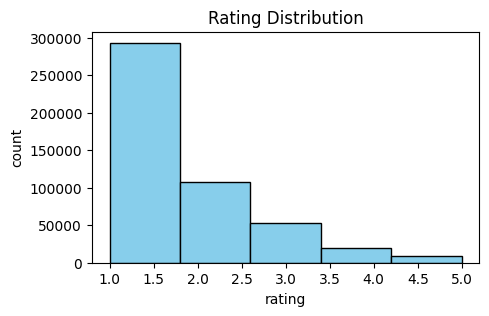

In [66]:
plt.figure(figsize=(5,3))
plt.hist(data['rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Rating Distribution')
plt.show()

In [67]:
#long tail analysis
user_act = data.groupby('user_id').size()
song_pop = data.groupby('track_id').size()

print(f"\nUser Activity (interactions per user):")
print(f"  Mean: {user_act.mean():.1f}")
print(f"  Median: {user_act.median():.1f}")
print(f"  Min: {user_act.min()}")
print(f"  Max: {user_act.max()}")
print(f"  Users with only 1 interaction: {(user_act == 1).sum()},  {(user_act == 1).sum() / len(user_act) * 100:.2f}%")
print(f"\nSong Popularity (interactions per song):")
print(f"  Mean: {song_pop.mean():.1f}")
print(f"  Median: {song_pop.median():.1f}")
print(f"  Min: {song_pop.min()}")
print(f"  Max: {song_pop.max()}")
print(f"  Songs with only 1 interaction: {(song_pop == 1).sum()},  {(song_pop == 1).sum() / len(song_pop) * 100:.2f}%")


User Activity (interactions per user):
  Mean: 10.0
  Median: 5.0
  Min: 1
  Max: 264
  Users with only 1 interaction: 5616,  11.68%

Song Popularity (interactions per song):
  Mean: 21.3
  Median: 6.0
  Min: 1
  Max: 4050
  Songs with only 1 interaction: 4283,  18.94%


In [68]:
user_top20 = int(len(user_act) * 0.2)
song_top20 = int(len(song_pop) * 0.2)

user_top20_prc = user_act.sort_values(ascending=False).head(user_top20).sum() / user_act.sum() * 100
song_top20_prc = song_pop.sort_values(ascending=False).head(song_top20).sum() / song_pop.sum() * 100

print(f"Top 20% most active users contribute to {user_top20_prc:.2f}% total interactions.")
print(f"Top 20% most popular songs contribute to {song_top20_prc:.2f}% total interactions.")

Top 20% most active users contribute to 61.03% total interactions.
Top 20% most popular songs contribute to 76.05% total interactions.


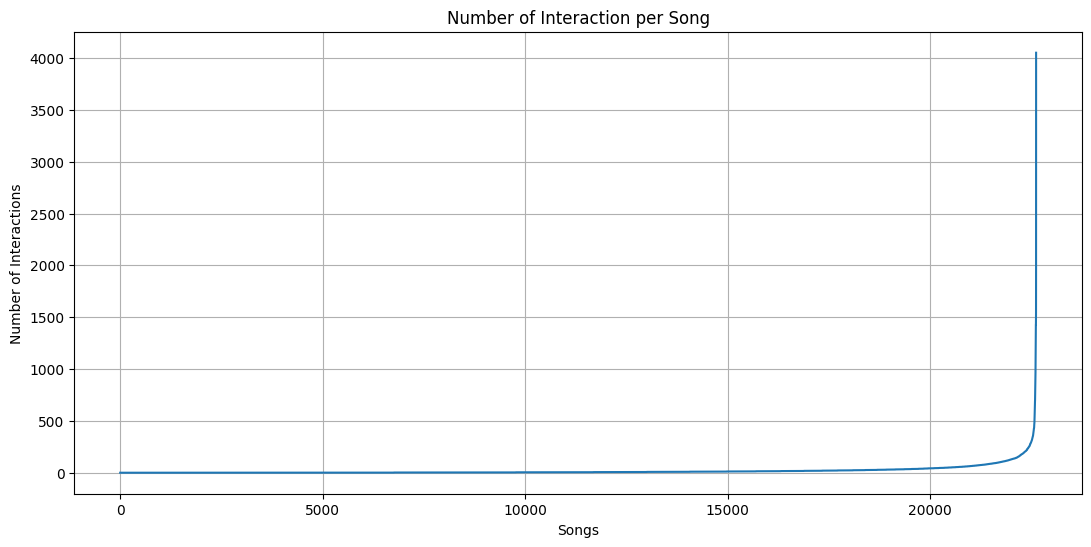

In [69]:
ordered_pop = song_pop.sort_values(ascending= True)

plt.figure(figsize=(13,6))
plt.plot(ordered_pop.values)
plt.title('Number of Interaction per Song')
plt.xlabel('Songs')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.show()

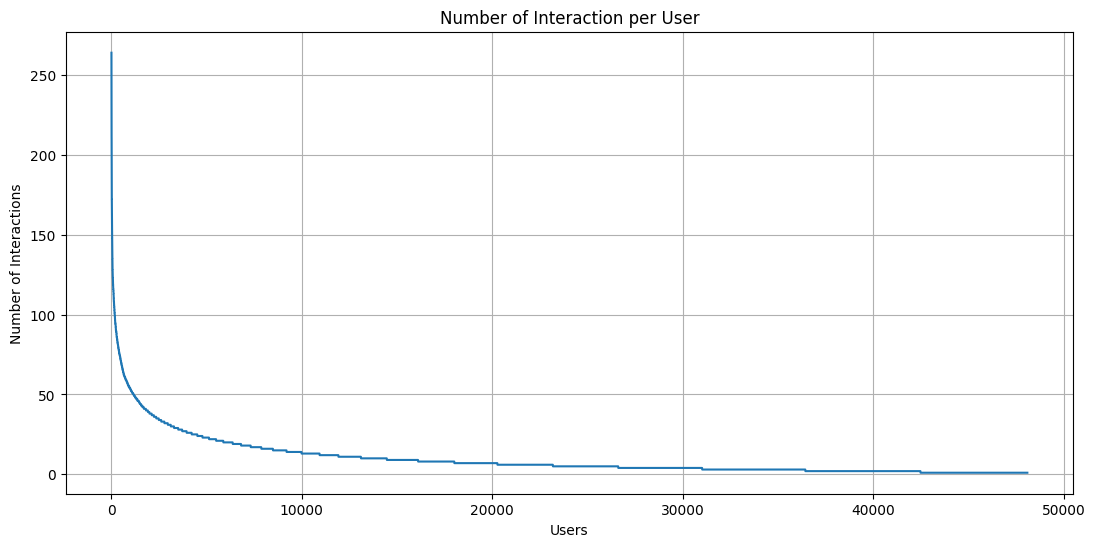

In [70]:
ordered_user = user_act.sort_values(ascending= False)

plt.figure(figsize=(13,6))
plt.plot(ordered_user.values)
plt.title('Number of Interaction per User')
plt.xlabel('Users')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.show()

In [71]:
#scaling features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = MinMaxScaler()
data[audio_features] = scaler.fit_transform(data[audio_features])
print("Scaled audio features preview:")
print(data[audio_features].head())


Scaled audio features preview:
     danceability  energy  loudness  speechiness  acousticness  \
291      0.436105   0.237  0.787359     0.031263      0.920683   
292      0.663286   0.610  0.789311     0.044316      0.629518   
294      0.520284   0.944  0.873555     0.430526      0.000352   
407      0.691684   0.668  0.841369     0.098526      0.050602   
408      0.643002   0.599  0.859021     0.038421      0.028916   

     instrumentalness  liveness   valence     tempo  
291          0.000323  0.979960  0.249747  0.536089  
292          0.839840  0.083066  0.441860  0.498139  
294          0.744745  0.160321  0.945399  0.535168  
407          0.003974  0.123246  0.874621  0.625723  
408          0.000000  0.197395  0.315470  0.469725  


In [72]:
print(data['year'].min())
print(data['year'].max())

1900
2020


In [73]:
def mood_category(data_p):
    valence = data_p['valence']
    energy = data_p['energy']
    accousticness = data_p['acousticness']

    if valence >= 0.5: #postitive mood
        if energy >= 0.5:
            return 'happy'
        else:
            return 'calm'
    else: #negative mood
        if energy >= 0.5:
            return 'angry'
        else:
            if accousticness >= 0.5:
                return 'sad'
            else:
                return 'melancholic'
            
data['mood'] = data.apply(mood_category, axis=1)



In [74]:
def era_category(data_e):
    year = data_e['year']
    if year < 1960:
        return 'Early Era'
    elif 1960 <= year < 1980:
        return 'Classic'
    elif 1980 <= year < 2000:
        return '2000s'
    else:
        return 'Modern'

In [75]:
def context_category(data_p):
    energy = data_p['energy']
    instrumentalness = data_p['instrumentalness']
    tempo = data_p['tempo']
    loudness = data_p['loudness']
    accousticness = data_p['acousticness']
    danceability = data_p['danceability']

    if energy >= 0.7 and danceability >= 0.7 and tempo >= 0.7 and instrumentalness < 0.3:
        return 'Party'
    elif energy >= 0.8 and tempo >= 0.75 and loudness >= 0.7:
        return 'Workout'
    elif energy < 0.4 and loudness >= 0.5 and instrumentalness >= 0.6:
        return 'Study'
    elif energy <0.4 and (accousticness >= 0.6 or instrumentalness < 0.5):
        return 'Relaxation'
    else:
        return 'General'


In [76]:
data['era'] = data.apply(era_category, axis=1)
data['context'] = data.apply(context_category, axis=1)
print(data[['era', 'context', 'mood']].head())

        era     context   mood
291  Modern  Relaxation    sad
292  Modern     General  angry
294  Modern     General  happy
407  Modern     General  happy
408  Modern     General  angry


In [77]:
print(data['tags'].head())

291                     folk, singer_songwriter, country
292    electronic, ambient, instrumental, chillout, d...
294                                  electronic, electro
407    rock, electronic, alternative, indie, pop, alt...
408    rock, alternative, indie, alternative_rock, in...
Name: tags, dtype: object


In [78]:
missing_values = data.isnull().sum()
print("Missing values in each column after preprocessing:")
print(missing_values.sort_values(ascending=False))

Missing values in each column after preprocessing:
track_id               0
user_id                0
era                    0
mood                   0
rating                 0
log_playc_c            0
log_playcount          0
time_signature         0
tempo                  0
valence                0
liveness               0
instrumentalness       0
acousticness           0
speechiness            0
mode                   0
loudness               0
key                    0
energy                 0
danceability           0
duration_ms            0
year                   0
tags                   0
spotify_id             0
spotify_preview_url    0
artist                 0
name                   0
playcount              0
context                0
dtype: int64


In [79]:
data.to_csv('preprocessed_data.csv', index=False)